In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import diffractio
import numpy as np
from matplotlib.pyplot import *
%matplotlib widget
import scipy as sp

from diffractio import um, nm, mm

In [3]:
import sys
sys.path.append("../../../")

import numerical_methods as Sim

In [4]:
## Simulation box conditions
z = .1*mm /10000  ## propagation distance
size = .01*mm  ## Box size
wavelength = 532 * nm  
N = 2*1024  ## number of discretization points of the box
shape = (N, N)

## Circular input filter radius
filter_radius = .06*um

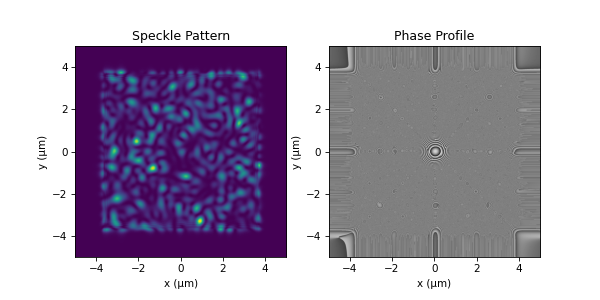

In [5]:
PELM_sim = Sim.solvers.PELM_diffractioSolver(z=z, filter_radius=filter_radius, size=size, wavelength=wavelength, N=N, random_amplitude=True)

PELM_sim.plot()

In [6]:
F = 10
f = np.linspace(0,1,F)

feature_points = np.array(np.meshgrid(f,f))

"""
feature_points = np.zeros((2, 2*F, 1))
feature_points[0,:F,0] = f
feature_points[1,F:,0] = f"""

# Config
encoding_shape = (10,10)

e:\anaconda3\envs\vic_diffractio_test\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
e:\anaconda3\envs\vic_diffractio_test\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


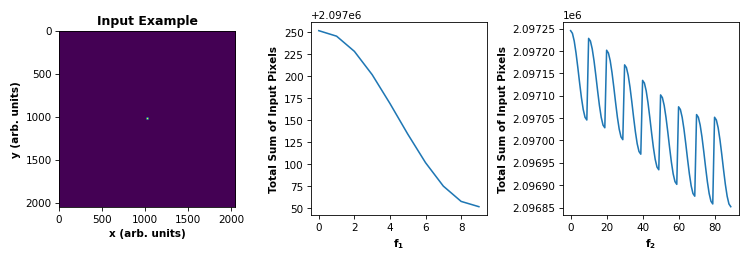

In [7]:
## Generate Input Profiles
input_masks = np.exp(1j*np.pi*Sim.ContinuosFeatures(f, f, encoding_shape, shape, ref=1/3))  ## More types of encodings on the masks.py file

fig, axs = subplots(1, 3, figsize=(10,3.5))
axs[0].imshow(np.abs(input_masks[10])*PELM_sim.filter)
axs[0].set_title("Input Example", weight="bold")

axs[0].set_xlabel("x (arb. units)", weight="bold")
axs[0].set_ylabel("y (arb. units)", weight="bold")

axs[1].plot(np.sum(input_masks[:F], axis=(1,2)))
axs[1].set_xlabel(r"$\mathbf{f_1}$")
axs[1].set_ylabel("Total Sum of Input Pixels", weight="bold")

axs[2].plot(np.sum(input_masks[F:], axis=(1,2)))
axs[2].set_xlabel(r"$\mathbf{f_2}$")
axs[2].set_ylabel("Total Sum of Input Pixels", weight="bold")

fig.tight_layout()

In [8]:
M = 10
noise_percentages = np.linspace(0,50,M)

hidden_features = np.zeros((M, F**2, *shape))
for _m in range(M):
    hidden_features[_m] = PELM_sim.solver(input_masks, normed=True, noise=noise_percentages[_m])
    

In [9]:
pixels = 2**9

x1, x2 = int(N/2) - int(pixels/2), int(N/2) + int(pixels/2)
y1, y2 = int(N/2) - int(pixels/2), int(N/2) + int(pixels/2)

mid_box_hidden_space = hidden_features[:, :, x1:x2, y1:y2]  ## select a box in the middle where numerical error is smaller

In [10]:
svds = np.zeros((M, F**2))
for _m in range(M):
    svds[_m] = Sim.Compute_Rank(mid_box_hidden_space[_m])

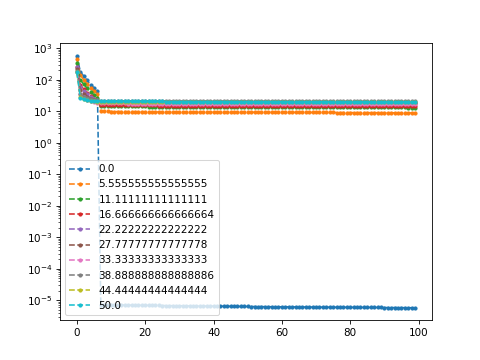

In [11]:
fig, axs = subplots(1)
for _m in range(M):
    axs.plot(svds[_m], "--", marker=".", label=noise_percentages[_m])
    
axs.set_yscale("log")
axs.legend()